# Assignment - Week 12 - Day 3



Saud Almuhaysh

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

from sklearn.metrics import accuracy_score
import random

import requests


***

## 1. Bank Marketing Dataset (Classification, target = "bank term deposit")

In [46]:
# Import the dataset and drop the na values
df1 = pd.read_csv('bank.csv',index_col=[0]).dropna()

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 30 to 44
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   balance    4521 non-null   int64 
 5   housing    4521 non-null   object
 6   loan       4521 non-null   object
 7   contact    4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 600.4+ KB


In [48]:
#change the name of target column
col_names = {'y': 'bank_term_deposit'}
df1.rename(columns=col_names, inplace= True)
df1.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,bank_term_deposit
age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [49]:
#change the type of target column from yes & no to 1 & 0
df1['bank_term_deposit'] = df1['bank_term_deposit'].map({'no': 0, 'yes':1})
df1.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,bank_term_deposit
age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [50]:
#drop all object columns 
df1 = df1.select_dtypes(exclude=['object'])
df1.head()

,balance,day,duration,campaign,pdays,previous,bank_term_deposit
age,,,,,,,
30,1787,19,79,1,-1,0,0
33,4789,11,220,1,339,4,0
35,1350,16,185,1,330,1,0
30,1476,3,199,4,-1,0,0
59,0,5,226,1,-1,0,0


## Plots 

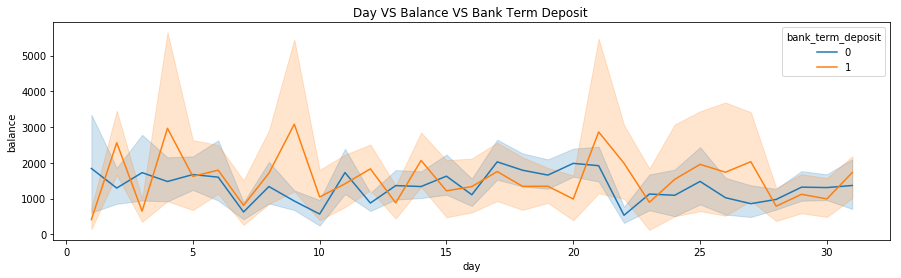

In [3]:
plt.figure(figsize = (15, 4))
plt.title('Day VS Balance VS Bank Term Deposit ');
ax = sns.lineplot(y=df1["balance"],x=df1["day"],hue=df1["bank_term_deposit"]);

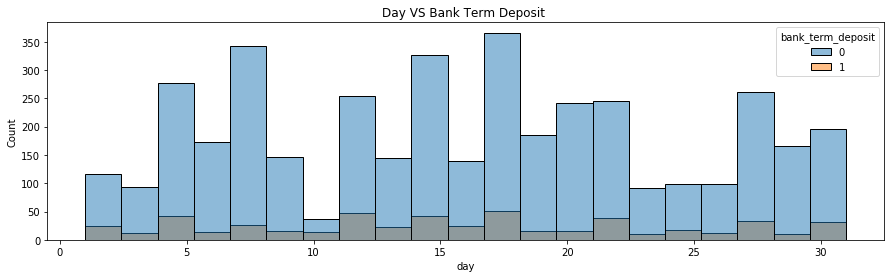

In [4]:
plt.figure(figsize = (15, 4))
plt.title('Day VS Bank Term Deposit ');
ax = sns.histplot(x=df1["day"],hue=df1["bank_term_deposit"]);

## Split the dataset 

In [5]:
train_C, test_C = train_test_split(
    df1,
    test_size=0.2,
    train_size = 0.8,
    random_state=9000
)

In [6]:
# Split the dataset into feature set and target column 

X_train_C = train_C.iloc[:, :-1]
y_train_C = train_C.iloc[:, -1]

X_test_C = test_C.iloc[:, :-1]
y_test_C = test_C.iloc[:, -1]

## Baseline Model

In [7]:
#To save the result in dataframe to comparte later 
compare1 = pd.DataFrame(columns = ["Model","Score (Train)","Score (Test)"])
compare1["Model"] = ["Baseline","Random Forest For Classification"]

# this is for tarin data
b_preds = [random.randint(0, 1) for x in range(len(y_train_C))]
Baseline_Score = accuracy_score(y_train_C, b_preds)
compare1["Score (Train)"][0] = Baseline_Score
Baseline_Score


0.5041482300884956

In [8]:
# this is for test data
b_preds = [random.randint(0, 1) for x in range(len(y_test_C))]
Baseline_Score = accuracy_score(y_test_C, b_preds)
compare1["Score (Test)"][0] = Baseline_Score
Baseline_Score

0.5104972375690607

## Random Forest For Classification

In [9]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
class_forest.fit(X_train_C, y_train_C)
preds_class = class_forest.predict(X_test_C)

In [10]:
val_train = class_forest.score(X_train_C, y_train_C)
compare1["Score (Train)"][1] = val_train
val_test = class_forest.score(X_test_C, y_test_C)
compare1["Score (Test)"][1] = val_test

print(f'Training Accuracy: {round(val_train,2)*100}%')
print(f'Test Set Accuracy: {round(val_test,2)*100}%')

Training Accuracy: 99.0%
Test Set Accuracy: 88.0%


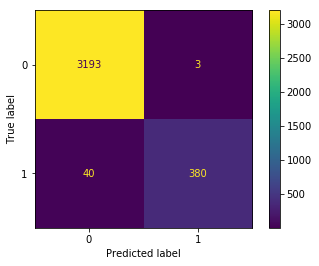

In [11]:
# We can also make a simple confusion matrix for train data
plot_confusion_matrix(class_forest, X_train_C, y_train_C);

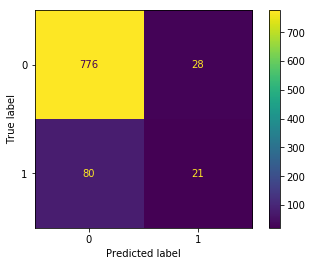

In [12]:
# We can also make a simple confusion matrix for test data
plot_confusion_matrix(class_forest, X_test_C, y_test_C);

## Compare the results of your test data to your train and baseline model

In [14]:
compare1

,Model,Score (Train),Score (Test)
0,Baseline,0.504148,0.510497
1,Random Forest For Classification,0.988108,0.880663


You can see the random forest model is very good because there is an improvement in the accurcy.

***

## 2. U.S. Pollution Dataset (Regression, target = "CO AQI")

In [15]:
df = pd.read_csv('pollution_us_2000_2016.csv',index_col=[0])
df.head()

C:\Users\SAOOU\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746661 entries, 0 to 24603
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value   f

In [17]:
# replace the spaces in the columns to underscore symbol
df.columns = df.columns.str.replace(' ','_')
df.head()

,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Units,NO2_Mean,...,SO2_Units,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Units,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [18]:
df = df.select_dtypes(exclude=['object'])
df = df.dropna()
df.head()

,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,O3_1st_Max_Hour,O3_AQI,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
1,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
5,4,13,3002,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,1.066667,2.3,0,26.0
9,4,13,3002,38.125000,51.0,8,48,0.007958,0.016,9,14,5.250000,11.0,19,16.0,1.762500,2.5,8,28.0
13,4,13,3002,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
17,4,13,3002,48.450000,61.0,22,58,0.006667,0.012,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0


## Split the dataset 

In [19]:
train, test = train_test_split(
    df,
    test_size=0.2,
    train_size = 0.8,
    random_state=9000
)

In [20]:
# Split the dataset into feature set and target column 
# Note: I drop the columns that I see it not necessary 

X_train = train.iloc[:, 3:-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, 3:-1]
y_test = test.iloc[:, -1]

In [21]:
# number of columns and rows in X_train and X_test
print(X_train.shape)
print(X_test.shape)

(349500, 15)
(87376, 15)


## Baseline Model

In [22]:
y_train.describe()

count    349500.000000
mean          5.998097
std           5.856393
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max         201.000000
Name: CO_AQI, dtype: float64

C:\Users\SAOOU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


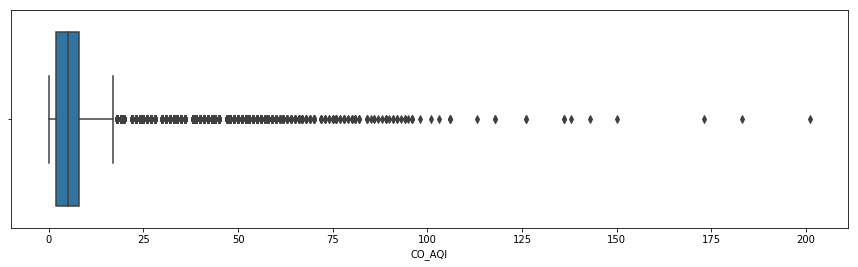

In [23]:
plt.figure(figsize = (15, 4))
ax = sns.boxplot(y_train);

Zoom in to the boxplot to now the max without outlier

C:\Users\SAOOU\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


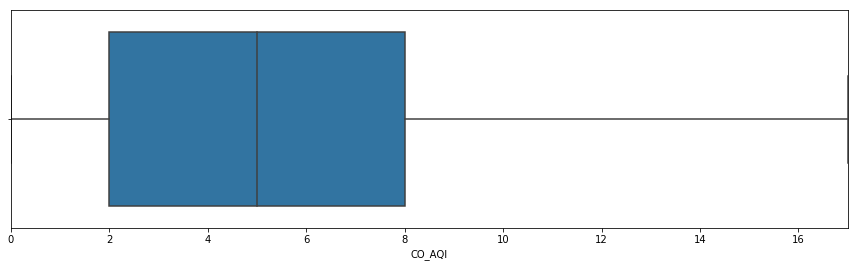

In [24]:
plt.figure(figsize = (15, 4))
ax = sns.boxplot(y_train)
plt.xlim(0, 17);

In [25]:
#To save the result in dataframe to comparte later 
compare = pd.DataFrame(columns = ["Model","MAE (Train)","MAE (Test)"])
compare["Model"] = ["Baseline","Random Forest For Regression"]


# I took the Min = 0 and Max num. of box plot = 17 to make the random number for tarin data
b_preds = [random.randint(0, 17) for x in range(len(y_train))]
Baseline_Score = mean_absolute_error(y_train, b_preds)
compare["MAE (Train)"][0] = Baseline_Score
Baseline_Score

# this is for test data
b_preds = [random.randint(0, 17) for x in range(len(y_test))]
Baseline_Score = mean_absolute_error(y_test, b_preds)
compare["MAE (Test)"][0] = Baseline_Score
Baseline_Score

6.361804156747849

## Random Forest For Regression

In [26]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(X_train, y_train)

# MAE for the train data 
preds_forest = reg_forest.predict(X_train)
Train_Score_Rg = mean_absolute_error(y_true=y_train, y_pred=preds_forest)
compare["MAE (Train)"][1] = Train_Score_Rg
Train_Score_Rg

0.0003439198855507867

In [27]:
# MAE for the test data 
preds_forest = reg_forest.predict(X_test)
Test_Score_Rg = mean_absolute_error(y_true=y_test, y_pred=preds_forest)
compare["MAE (Test)"][1] = Test_Score_Rg
Test_Score_Rg

0.0007084325215162054

In [28]:
reg_forest.feature_importances_

array([1.70270526e-05, 4.54690615e-06, 5.86164647e-05, 2.42243540e-06,
       1.78576329e-05, 4.36881081e-05, 1.30094722e-03, 1.53853509e-04,
       7.42030123e-06, 6.48801364e-04, 3.51448409e-05, 6.34087945e-04,
       4.07778062e-05, 9.97026842e-01, 7.96627160e-06])

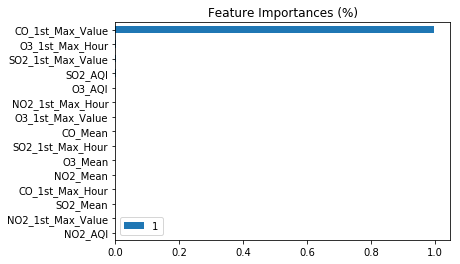

In [29]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

## Compare the results of your test data to your train and baseline model

In [30]:
compare

,Model,MAE (Train),MAE (Test)
0,Baseline,6.360724,6.361804
1,Random Forest For Regression,0.000344,0.000708


You can see the random forest model is very good because there is an improvement in the ratio of mean absolute error.

***

I just want to try the Decision Trees for this database

## Decision Trees For Regression

In [31]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 4, criterion= 'mse')
reg_tree.fit(X_train, y_train)

preds_tree = reg_tree.predict(X_test)

# evaluation metrics
mean_absolute_error(y_true=y_test, y_pred=preds_tree)

0.2654624928724061

In [32]:
y_train.head(1)

109161    2.0
Name: CO_AQI, dtype: float64

In [33]:
X_train.head(1)

,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,O3_1st_Max_Hour,O3_AQI,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour
109161,4.404167,12.5,6,11,0.034333,0.044,12,37,0.466667,0.9,0,0.0,0.2,0.2,0


In [34]:
# Note: this is the value of the first column 
reg_tree.predict([[4.404167,12.5,6,11,0.034333,0.044,12,37,0.466667,0.9,0,0.0,0.200000,0.2,0]])

array([2.00008782])

It same the first target, that is good

In [35]:
# this result is same what I got in plot the column No. 14 is important
reg_tree.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

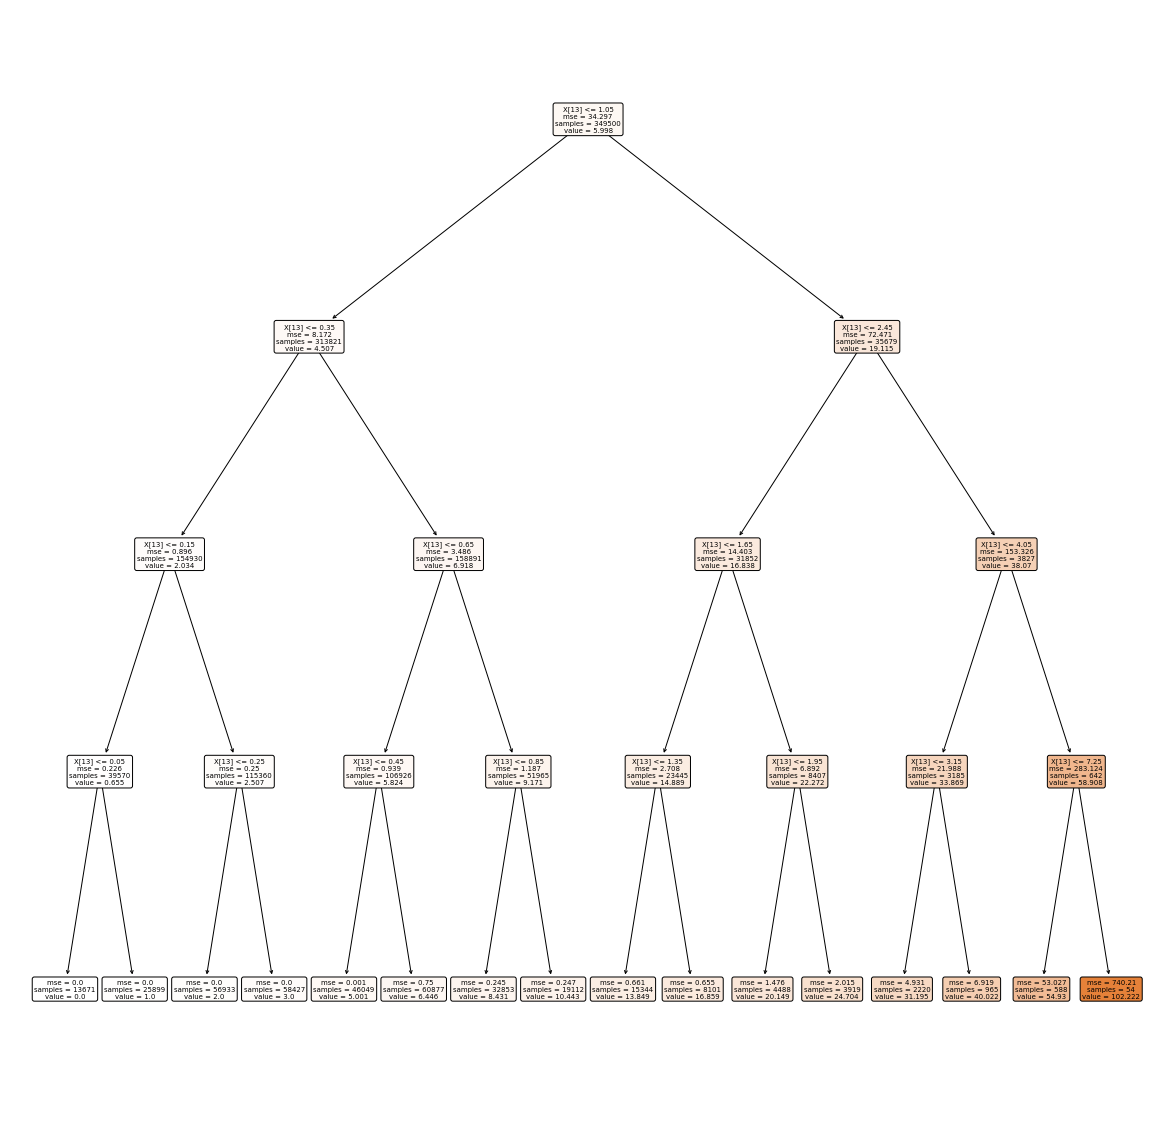

In [36]:
# Plot the decision tree
plt.figure(figsize=(20,20))

tree.plot_tree(
    reg_tree, 
    filled=True,
    rounded=True,
    
);

***

## Summary 

   - Random Forest For Classification

In [37]:
compare1

,Model,Score (Train),Score (Test)
0,Baseline,0.504148,0.510497
1,Random Forest For Classification,0.988108,0.880663


- Random Forest For Regression

In [38]:
compare

,Model,MAE (Train),MAE (Test)
0,Baseline,6.360724,6.361804
1,Random Forest For Regression,0.000344,0.000708
